# Phân tích và dự đoán điểm cuối kì của sinh viên dựa trên dữ liệu học thuật và xã hội.

## Bộ dữ liệu
- **Nguồn**: [UCI Student Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- **Mô tả**: Bộ dữ liệu chứa thông tin về học lực của sinh viên dựa trên các yếu tố học thuật và xã hội. Dữ liệu bao gồm các thuộc tính như điểm số, thời gian học tập, hoàn cảnh gia đình, và các yếu tố xã hội khác. Thông tin chi tiết về bộ dữ liệu có thể được tìm thấy trong liên kết trên.

## Mô hình
Sử dụng thuật toán Random Forest để dự đoán điểm cuối kì (G3) của sinh viên dựa trên các thuộc tính khác trong bộ dữ liệu. Mục tiêu là xây dựng một mô hình có khả năng dự đoán chính xác điểm số cuối kì dựa trên các yếu tố học thuật và xã hội.

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Tải dữ liệu
data = pd.read_csv('data/student-mat.csv', sep=';')
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [3]:
# Khám phá dữ liệu
print('Shape of the dataset:', data.shape)
print('Missing values in each column:')
print(data.isnull().sum())


Shape of the dataset: (395, 33)
Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [4]:
# Lựa chọn thuộc tính
X = data.drop(columns=['G3'])
y = data['G3']

# Xác định các thuộc tính phân loại và số
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

print('Categorical features:', categorical_features)
print('Numerical features:', numerical_features)


Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [5]:
# Xử lý giá trị bị thiếu
numercial_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [6]:
# Tinh chỉnh tham số
# Các tham số như max_depth và n_estimators được tìm thấy thông qua vòng lặp và so sánh kết quả tốt nhất.
rf_regressor = RandomForestRegressor(criterion='absolute_error', max_depth=6, n_estimators=300, random_state=42)


In [7]:
# Xây dựng pipeline cho tiền xử lý và mô hình
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numercial_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_regressor)
])


In [8]:
# Chia tập dữ liệu huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Huấn luyện mô hình
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Evaluation (test):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Regression Model Evaluation (test):
Mean Absolute Error (MAE): 1.1207
Mean Squared Error (MSE): 3.2449
Root Mean Squared Error (RMSE): 1.8014
R-squared (R²): 0.8417


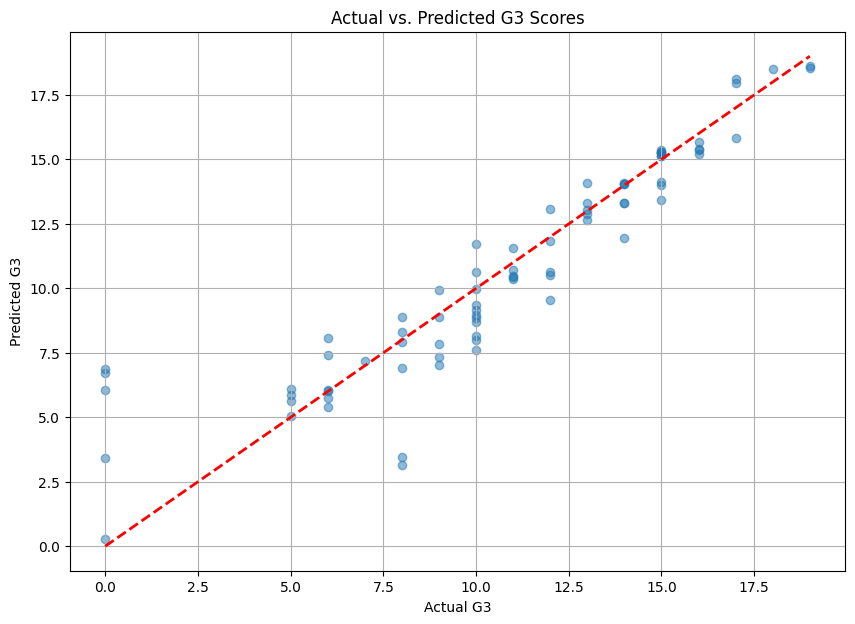

In [11]:
# Biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3 Scores')
plt.grid(True)
plt.show()


In [12]:
# Độ quan trọng của các thuộc tính
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

importances = model.named_steps["regressor"].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)



Feature Importances:
              Feature  Importance
14                 G2    0.773109
12           absences    0.086453
13                 G1    0.016561
6              famrel    0.009193
8               goout    0.007558
11             health    0.007228
36        reason_home    0.006126
0                 age    0.006105
4           studytime    0.005556
10               Walc    0.005231
32         Fjob_other    0.004307
2                Fedu    0.004192
7            freetime    0.003877
43      schoolsup_yes    0.003691
30       Fjob_at_home    0.003262
5            failures    0.003227
29       Mjob_teacher    0.002868
3          traveltime    0.002825
41     guardian_other    0.002573
1                Medu    0.002466
35      reason_course    0.002375
28      Mjob_services    0.002291
42       schoolsup_no    0.002236
9                Dalc    0.002203
33      Fjob_services    0.001876
25       Mjob_at_home    0.001749
37       reason_other    0.001676
57       romantic_yes    0

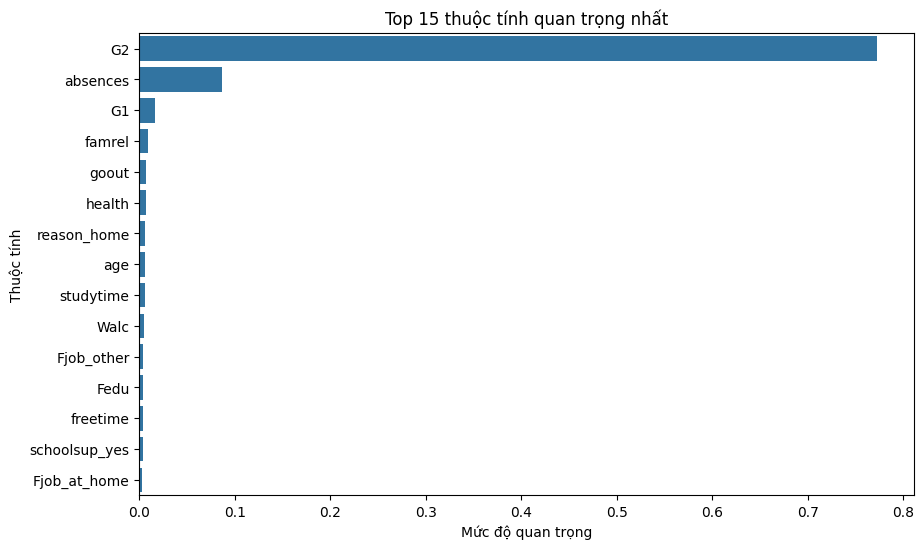

In [13]:
# 15 thuộc tính quan trọng nhất
top_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title("Top 15 thuộc tính quan trọng nhất")
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Thuộc tính")
plt.show()


In [14]:
# Xuất mô hình
import joblib

joblib.dump(model, 'student_performance_regressor.joblib')

print("Model exported to student_performance_regressor.joblib")


Model exported to student_performance_regressor.joblib


---
## So sánh các Setup cho mô hình Random Forest

Để hiểu rõ hơn về tầm quan trọng của các điểm số kỳ trước (`G1`, `G2`), chúng ta sẽ thử nghiệm và so sánh 3 kịch bản (setup) khác nhau cho mô hình Random Forest đã tinh chỉnh.
- **Setup A**: Sử dụng tất cả các thuộc tính, bao gồm cả `G1` và `G2`.
- **Setup B**: Chỉ sử dụng `G1`, loại bỏ `G2`.
- **Setup C**: Loại bỏ cả `G1` và `G2`.

In [15]:
def train_and_evaluate_rf_setups(data, cols_to_drop):
    """
    Hàm để huấn luyện và đánh giá mô hình Random Forest với một tập thuộc tính đầu vào nhất định.
    
    Args:
        data (pd.DataFrame): DataFrame chứa toàn bộ dữ liệu.
        cols_to_drop (list): Danh sách các cột cần loại bỏ khỏi tập thuộc tính X (ngoài 'G3').
        
    Returns:
        dict: Một dictionary chứa các chỉ số đánh giá (MAE, MSE, RMSE, R2).
    """
    # 1. Lựa chọn thuộc tính
    X = data.drop(columns=['G3'] + cols_to_drop)
    y = data['G3']

    # 2. Chia tập dữ liệu huấn luyện và kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Xác định các loại thuộc tính cho X hiện tại
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # 4. Tạo preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_features),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ]
    )

    # 5. Định nghĩa mô hình Random Forest với các tham số tốt nhất đã tìm thấy
    rf_regressor = RandomForestRegressor(criterion='absolute_error', n_estimators=300, random_state=42)

    # 6. Tạo pipeline hoàn chỉnh
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', rf_regressor)
    ])

    # 7. Huấn luyện mô hình
    model_pipeline.fit(X_train, y_train)

    # 8. Dự đoán và đánh giá
    y_pred = model_pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Chạy 3 setups cho Random Forest
results_A_rf = train_and_evaluate_rf_setups(data, cols_to_drop=[])
results_B_rf = train_and_evaluate_rf_setups(data, cols_to_drop=['G2'])
results_C_rf = train_and_evaluate_rf_setups(data, cols_to_drop=['G1', 'G2'])


### Bảng tổng kết kết quả cho Random Forest
Dưới đây là bảng so sánh hiệu suất của 3 setup cho mô hình Random Forest.


In [16]:
# Tạo DataFrame để so sánh các setup của Random Forest
comparison_rf_df = pd.DataFrame({
    'Setup A (G1, G2)': results_A_rf,
    'Setup B (chỉ G1)': results_B_rf,
    'Setup C (không G1, G2)': results_C_rf
}).T # Chuyển vị để các setup thành hàng

# Định dạng lại số cho dễ đọc
comparison_rf_df = comparison_rf_df.map('{:.4f}'.format)

print("--- BẢNG SO SÁNH CÁC SETUP CỦA RANDOM FOREST ---")
print(comparison_rf_df)


--- BẢNG SO SÁNH CÁC SETUP CỦA RANDOM FOREST ---
                           MAE      MSE    RMSE      R2
Setup A (G1, G2)        1.1916   3.5254  1.8776  0.8281
Setup B (chỉ G1)        1.7453   6.0538  2.4604  0.7048
Setup C (không G1, G2)  3.0779  14.9800  3.8704  0.2695


---
## So sánh toàn diện các Mô hình khác nhau trên từng Setup

Bây giờ, chúng ta sẽ mở rộng so sánh ra các mô hình khác, chạy trên từng setup để có một cái nhìn tổng quan.
- **Các mô hình**: Linear Regression, Decision Tree, và Gradient Boosting.
- **Các setup**: A, B, và C.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

def train_and_evaluate_models(data, model_instance, cols_to_drop):
    """
    Hàm chung để huấn luyện và đánh giá một mô hình bất kỳ với một tập thuộc tính đầu vào nhất định.
    """
    # 1. Lựa chọn thuộc tính
    X = data.drop(columns=['G3'] + cols_to_drop)
    y = data['G3']

    # 2. Chia tập dữ liệu huấn luyện và kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Xác định các loại thuộc tính cho X hiện tại
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # 4. Tạo preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_features),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ]
    )

    # 5. Tạo pipeline hoàn chỉnh
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model_instance)
    ])

    # 6. Huấn luyện mô hình
    model_pipeline.fit(X_train, y_train)

    # 7. Dự đoán và đánh giá
    y_pred = model_pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# --- BẮT ĐẦU SO SÁNH CÁC MÔ HÌNH KHÁC ---

# Định nghĩa các mô hình để so sánh
models_to_compare = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Chạy so sánh
all_models_results = {}
for model_name, model_instance in models_to_compare.items():
    comparison_df = pd.DataFrame({
    'Setup A (G1, G2)': train_and_evaluate_models(data, model_instance, cols_to_drop=[]),
    'Setup B (chỉ G1)': train_and_evaluate_models(data, model_instance, cols_to_drop=['G2']),
    'Setup C (không G1, G2)': train_and_evaluate_models(data, model_instance, cols_to_drop=['G1', 'G2'])
    }).T # Chuyển vị để các setup thành hàng
    all_models_results[model_name] = comparison_df

print("\n--- HOÀN TẤT SO SÁNH ---")



--- HOÀN TẤT SO SÁNH ---


### Bảng so sánh các mô hình khác
Dưới đây là bảng so sánh hiệu suất của các mô hình khác trên 3 setup.


In [18]:
# In kết quả so sánh cho từng mô hình
for model_name, comparison_df in all_models_results.items():
    # Định dạng lại số cho dễ đọc
    comparison_df = comparison_df.map('{:.4f}'.format)
    
    print(f"\n--- BẢNG SO SÁNH CÁC SETUP CỦA {model_name.upper()} ---")
    print(comparison_df)


--- BẢNG SO SÁNH CÁC SETUP CỦA LINEAR REGRESSION ---
                           MAE      MSE    RMSE      R2
Setup A (G1, G2)        1.6467   5.6566  2.3784  0.7241
Setup B (chỉ G1)        2.2722   8.3967  2.8977  0.5905
Setup C (không G1, G2)  3.3953  17.6037  4.1957  0.1415

--- BẢNG SO SÁNH CÁC SETUP CỦA DECISION TREE ---
                           MAE      MSE    RMSE       R2
Setup A (G1, G2)        1.3165   6.6076  2.5705   0.6778
Setup B (chỉ G1)        2.1392  10.4937  3.2394   0.4882
Setup C (không G1, G2)  3.5696  22.8101  4.7760  -0.1124

--- BẢNG SO SÁNH CÁC SETUP CỦA GRADIENT BOOSTING ---
                           MAE      MSE    RMSE      R2
Setup A (G1, G2)        1.1506   3.9286  1.9821  0.8084
Setup B (chỉ G1)        1.6425   5.5671  2.3595  0.7285
Setup C (không G1, G2)  3.1128  15.4938  3.9362  0.2444


### Bảng tổng kết kết quả RMSE cho tất cả các mô hình và setup

In [19]:
rmse_df = pd.DataFrame()
rmse_df["Random Forest"] = comparison_rf_df['RMSE']

for model_name, comparison_df in all_models_results.items():
    rmse_df[model_name] = comparison_df['RMSE'].map('{:.4f}'.format)

rmse_df.index = pd.Index(['A (G1, G2)', 'B (G1)', 'C (no G1, G2)'])
rmse_df.columns.name = "Setup"

print("\n--- BẢNG TỔNG KẾT KẾT QUẢ RMSE CHO TẤT CẢ CÁC MÔ HÌNH VÀ SETUP ---")
print(rmse_df)


--- BẢNG TỔNG KẾT KẾT QUẢ RMSE CHO TẤT CẢ CÁC MÔ HÌNH VÀ SETUP ---
Setup         Random Forest Linear Regression Decision Tree Gradient Boosting
A (G1, G2)           1.8776            2.3784        2.5705            1.9821
B (G1)               2.4604            2.8977        3.2394            2.3595
C (no G1, G2)        3.8704            4.1957        4.7760            3.9362
